<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_06_%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84_%EB%B6%84%ED%8F%AC%ED%86%B5%EA%B3%84%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.06. 기초통계 - 분포통계량
---
* 날짜: 2022-05-09
* 이름: 박태현

## 학습내용
    - 백분위수, 사분위수
    - 왜도
    - 첨도

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  분포 통계
---

* 분포통계는 데이터의 위치나 모양을 확인

### **| 데이터 생성**

```
# 아래의 함수는 정규분포를 따르는 랜덤한 실수를 반환합니다.
np.random.normal(loc, scale, size)
# loc = 평균
# scale = 표준편차
# size = 추출할 데이터(표본)의 크기
```

* 평균 0, 표준편차 1인 정규분포 데이터 1000개를 생성하기

In [4]:
# 넘파이 랜덤 시드 0으로 설정
np.random.seed(0)
# 넘파이 배열 `a`로 바인딩
a = np.random.normal(0,1,1000)

* `a` 분포 그리기

(array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]),
 <a list of 10 Patch objects>)

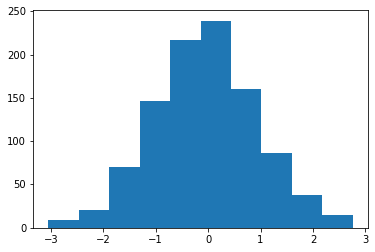

In [5]:
plt.hist(a)

### **| 백분위수와 사분위수**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-03.png?raw=true width=800>
</p>

```
np.percentile(x,  percent)
np.quantile(x, percent_ratio)
```

* 하위 10% 에 위치한 값 확인

In [6]:
# percentile 사용
np.percentile(a, 10)
# quantile 사용
np.percentile(a, 10), np.quantile(a, 0.1)

(-1.2991423253580128, -1.2991423253580128)

* 하위 80% 에 위치한 값 확인

In [7]:
# percentile 사용

# quantile 사용
np.percentile(a, 80), np.quantile(a, 0.8)

(0.7883967913601156, 0.7883967913601156)

### **| 왜도 (skew)**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-01.png?raw=true width=800>
</p>



\begin{align}
\text{skew} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i-\overline{x})^3}{ \sqrt{\tfrac{1}{N-1} \sum_{i=1}^N (x_i-\overline{x})^2}^{\,3}}
\end{align}

```
from scipy.stats import skew
skew(a)
```

* `a`의 왜도 구하기

In [8]:
from scipy.stats import skew
skew(a)

0.03385895323565712

* 세개의 데이터의 분포를 그리고 각각의 왜도도 구해봅니다.

```
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]
```

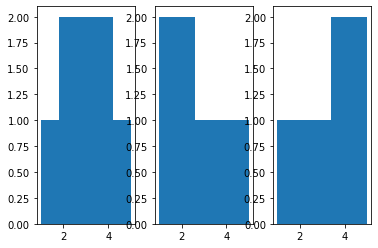

In [23]:
x1 = [1,2,3,4,5,2,3,4]
x2 = [1,2,3,4,5,1,2]
x3 = [1,2,3,4,5,4,5]

plt.subplot(131)
plt.hist(x1,bins=5)
plt.subplot(132)
plt.hist(x2,bins=5)
plt.subplot(133)
plt.hist(x3,bins=5)

plt.show()

In [10]:
skew(x1), skew(x2), skew(x3)

(0.0, 0.478415965387339, -0.4784159653873392)

### **| 첨도(kurtosis)**


<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0306-02.png?raw=true width=300>
</p>


\begin{align}
\text{kurtosis} = 
\frac{\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^4}{\left(\tfrac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2\right)^2} - 3
\end{align}

```
from scipy.stats import kurtosis
kurtosis(a)
```

In [ ]:
from scipy.stats import kurtosis
kurtosis(a)

-0.0467663244783294

* 세개의 데이터의 분포를 그리고 각각의 첨도도 구해봅니다.

```
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]
```

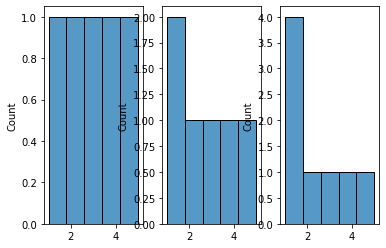

In [24]:
x1 = [1,2,3,4,5,]
x2 = [1,2,3,4,5,1]
x3 = [1,2,3,4,5,1,1,1]

plt.subplot(131)
sns.histplot(x1,bins = 5)
plt.subplot(132)
sns.histplot(x2,bins = 5)
plt.subplot(133)
sns.histplot(x3,bins = 5)

plt.show()

In [ ]:
kurtosis(x1), kurtosis(x2), kurtosis(x3)

(-1.3, -1.3650000000000002, -0.9975510204081632)

## 예제
---

#### **예제 01**

1. 지난 시간에 배운 scipy 라이브러리의 gamma 함수를 사용합니다. 

2. a값이 4인 감마함수로 부터 표본을 1000개 추출하고 `x3`로 바인딩합니다.

4. a값이 12인 감마함수로 부터 표본을 1000개 추출하고 `x4`로 바인딩합니다.

6. `x3`의 모든 요소에 -1을 곱한 후 `x2`로 바인딩합니다.

6. `x4`의 모든 요소에 -1을 곱한 후 `x1`로 바인딩합니다.

7. `x1, x2, x3, x4`의 분포를 각각 그립니다.

7. `x1, x2, x3, x4`의 왜도를 각각 구합니다.

7. `x1, x2, x3, x4`의 첨도를 각각 구합니다.


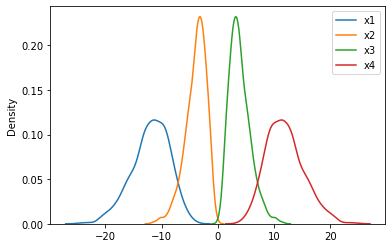

In [31]:
import scipy as sp
from scipy import stats
from scipy.stats import *

gam = sp.stats.gamma(a= 4)
x3 = gam.rvs(1000)

gam = sp.stats.gamma(a= 12)
x4 = gam.rvs(1000)

x2 = x3 * -1

x1 = x4 * -1

xs = ['x1','x2','x3','x4']

for x in xs : 
  sns.kdeplot(x = eval(x))

plt.legend(xs)

In [ ]:
skew(x1), skew(x2), skew(x3), skew(x4)

(-0.541409139087885, -1.140184586967151, 1.140184586967151, 0.541409139087885)

In [ ]:
kurtosis(x1), kurtosis(x2), kurtosis(x3), kurtosis(x4)

(0.2456229907565981, 2.58491743081363, 2.58491743081363, 0.2456229907565981)

#### **예제 02**

타이타닉 데이터셋을 가져오고, 수치자료형 변수들의 **산포통계**와 **분포통계**를 정리하세요.

In [ ]:
df1 = pd.read_csv('/content/titanic.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df = df1[ ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] ]
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
df = df.fillna(df['Age'].median())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
print(df['PassengerId'].std())
print(np.percentile(df['PassengerId'], 75) - np.percentile(df['PassengerId'], 25))

257.3538420152301
445.0


In [ ]:
print(df['Survived'].std())
print(np.percentile(df['Survived'], 75) - np.percentile(df['Survived'], 25))

0.4865924542648585
1.0


In [ ]:
print(df['Pclass'].std())
print(np.percentile(df['Pclass'], 75) - np.percentile(df['Pclass'], 25))

0.8360712409770513
1.0


In [ ]:
print(df['Age'].std())
print(np.percentile(df['Age'], 75) - np.percentile(df['Age'], 25))

13.019696550973194
13.0


In [ ]:
print(df['SibSp'].std())
print(np.percentile(df['SibSp'], 75) - np.percentile(df['SibSp'], 25))

1.1027434322934275
1.0


In [ ]:
print(df['Parch'].std())
print(np.percentile(df['Parch'], 75) - np.percentile(df['Parch'], 25))

0.8060572211299559
0.0


In [ ]:
print(df['Fare'].std())
print(np.percentile(df['Fare'], 75) - np.percentile(df['Fare'], 25))

49.693428597180905
23.0896
